In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

---
# BGL

In [2]:
# ファイルパスを指定
log_file = "../../dataset/loghub/BGL/BGL.csv"

# カラム名を指定
columns = [
    "Label",
    "LineId",
    "Date",
    "Node",
    "Timestamp",
    "NodeRepeat",
    "Type",
    "Component",
    "Level",
    "Content",
]

# ファイルを行ごとに読み込む
with open(log_file, "r") as file:
    lines = file.readlines()

# 各行をスペースで分割し、9列目以降を10列目にまとめる
data = []
for line in tqdm(lines):
    split_line = line.split(maxsplit=9)  # 最初の9列まで分割
    if len(split_line) < 10:  # 9列目までしかない場合、10列目を空にする
        split_line.append("")
    data.append(split_line)

# DataFrameに変換
bgl_df = pd.DataFrame(data, columns=columns)

# DataFrameの確認
print(bgl_df.head())

100%|██████████| 4747963/4747963 [00:10<00:00, 446961.87it/s]


  Label      LineId        Date                 Node  \
0     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
1     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
2     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
3     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
4     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   

                    Timestamp           NodeRepeat Type Component Level  \
0  2005-06-03-15.42.50.363779  R02-M1-N0-C:J12-U11  RAS    KERNEL  INFO   
1  2005-06-03-15.42.50.527847  R02-M1-N0-C:J12-U11  RAS    KERNEL  INFO   
2  2005-06-03-15.42.50.675872  R02-M1-N0-C:J12-U11  RAS    KERNEL  INFO   
3  2005-06-03-15.42.50.823719  R02-M1-N0-C:J12-U11  RAS    KERNEL  INFO   
4  2005-06-03-15.42.50.982731  R02-M1-N0-C:J12-U11  RAS    KERNEL  INFO   

                                      Content  
0  instruction cache parity error corrected\n  
1  instruction cache parity error corrected\n  
2  instruction cache parity error corrected\n  
3  instruction cache

In [3]:
bgl_label = list(bgl_df["Label"].unique())
bgl_label_num = []
for i in range(len(bgl_label)):
    bgl_label_num.append(len(bgl_df[bgl_df["Label"] == bgl_label[i]]))
bgl_label_num = np.array(bgl_label_num)
print(f"label={bgl_label}")
print(f"label_num={bgl_label_num}")
print(f"total_lines={len(bgl_df)}")

label=['-', 'APPREAD', 'KERNDTLB', 'KERNMC', 'KERNRTSP', 'KERNSTOR', 'APPCHILD', 'APPALLOC', 'KERNSOCK', 'MASNORM', 'LINKDISC', 'KERNNOETH', 'KERNTERM', 'APPUNAV', 'KERNPOW', 'KERNPROG', 'LINKPAP', 'APPBUSY', 'APPTORUS', 'MASABNORM', 'KERNCON', 'APPSEV', 'MONPOW', 'MONNULL', 'KERNMNT', 'KERNMNTF', 'KERNMICRO', 'APPRES', 'LINKIAP', 'KERNPAN', 'KERNEXT', 'KERNFLOAT', 'KERNBIT', 'KERNRTSA', 'MMCS', 'KERNREC', 'KERNSERV', 'MONILL', 'APPTO', 'LINKBLL', 'KERNTLBE', 'APPOUT']
label_num=[4399503    5983  152734     342    3983   63491     320     144     209
      10      24      14   23338    2048     192       5      14     512
      10      37      16   49651      12       2     720   31531    1503
    2370     166      18       1       3       1       3       3    6145
      94       1    1991       2       1     816]
total_lines=4747963


APPREAD: アプリケーションの読み取り操作に関連するエラー

KERNDTLB: カーネルのデータTLB（Translation Lookaside Buffer）関連のエラー

KERNMC: カーネルのメモリ制御（Memory Control）関連のエラー

KERNRTSP: カーネルのリアルタイムスケジューリング関連のエラー

KERNSTOR: カーネルのストレージ管理に関連するエラー

APPCHILD: アプリケーションが生成した子プロセスに関連するエラー

APPALLOC: アプリケーションのリソース（例: メモリ）の割り当て失敗

KERNSOCK: カーネルのソケット操作に関連するエラー

MASNORM: 大規模システムの正常動作に関連するログ（異常ではない場合も）

LINKDISC: ネットワークリンクの切断を示すエラー

KERNNOETH: カーネルでのEthernet関連のエラー

KERNTERM: カーネルのプロセス終了または停止に関連するエラー

APPUNAV: アプリケーションが利用不可であることを示すエラー

KERNPOW: カーネルの電源管理に関連するエラー

KERNPROG: カーネルのプログラムエラー

LINKPAP: ネットワークリンクの特定のプロトコル（例: PAP）のエラー

APPBUSY: アプリケーションがビジー状態にあることを示すエラー

APPTORUS: トーラスネットワーク（高性能計算で使用されるトポロジ）のエラー

MASABNORM: 大規模システムの異常状態

KERNCON: カーネル接続関連のエラー

APPSEV: アプリケーションの重大なエラー（Severity Levelが高い）

MONPOW: モニター（監視システム）の電源管理エラー

MONNULL: モニター（監視システム）でのNULL値またはデータ不在エラー

KERNMNT: カーネルのマウント操作に関連するエラー

KERNMNTF: カーネルのマウント失敗エラー

KERNMICRO: カーネルのマイクロコード関連のエラー

APPRES: アプリケーションのリソース関連エラー

LINKIAP: ネットワークリンクのIAP（認証プロトコル）関連エラー

KERNPAN: カーネルパニック（重大なシステムクラッシュ）

KERNEXT: カーネルの拡張モジュール関連のエラー

KERNFLOAT: カーネルの浮動小数点演算関連エラー

KERNBIT: カーネルのビット操作関連のエラー

KERNRTSA: カーネルのリアルタイムスケジューリング操作関連エラー

MMCS: 管理コンソール（Management and Monitoring Console System）のエラー

KERNREC: カーネルのデータ復旧関連エラー

KERNSERV: カーネルのサービス管理に関連するエラー

MONILL: モニター（監視システム）の不正データまたは無効状態

APPTO: アプリケーションのタイムアウト

LINKBLL: ネットワークリンクのエラー（特定のプロトコルBLL）

KERNTLBE: カーネルのTLB（Translation Lookaside Buffer）エラー

APPOUT: アプリケーションの出力エラー


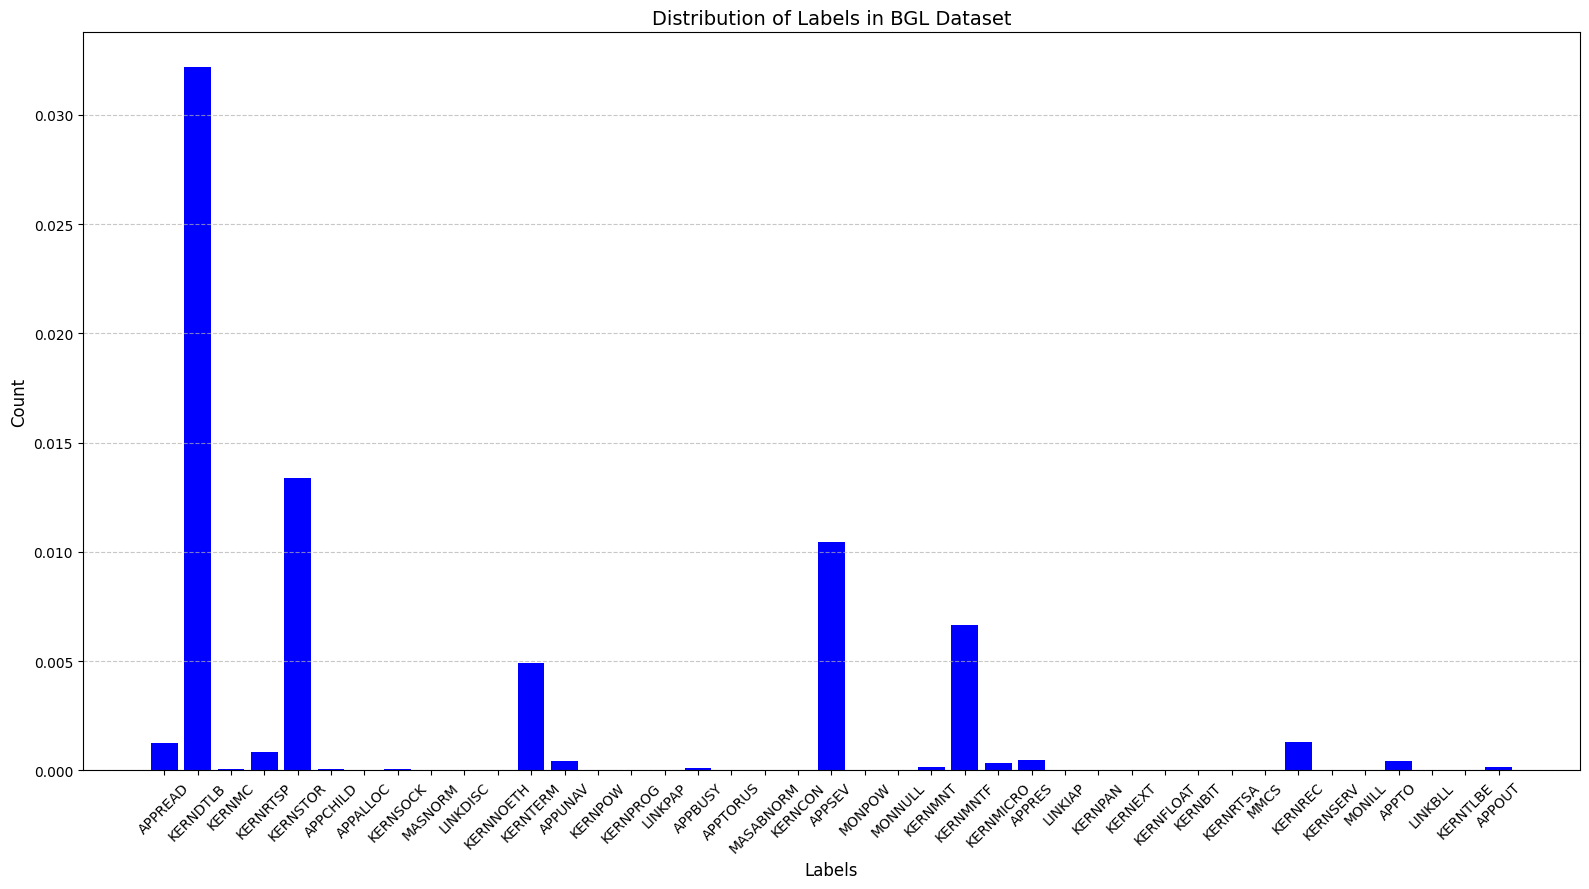

In [4]:
plt.figure(figsize=(16, 9))
plt.bar(bgl_label[1:], bgl_label_num[1:] / len(bgl_df), color="blue")
plt.title("Distribution of Labels in BGL Dataset", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

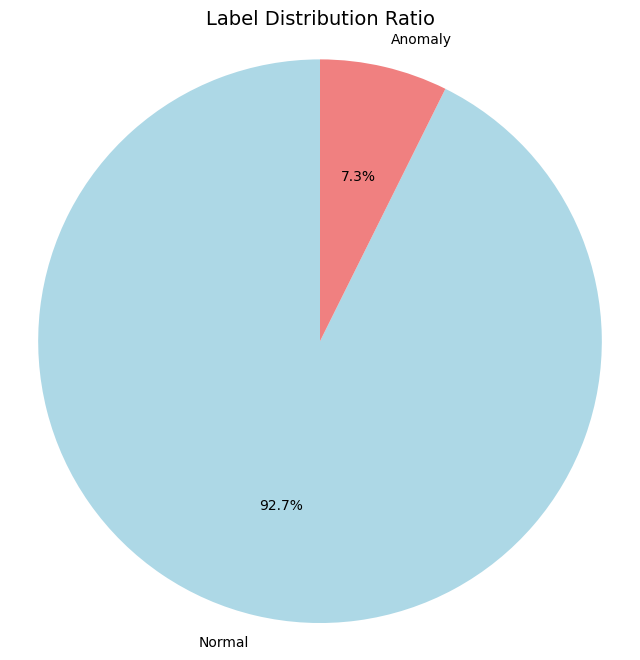

In [5]:
# 割合を計算
other_labels_ratio = bgl_label_num[1:].sum() / len(bgl_df)  # 2番目以降のラベルの割合
first_label_ratio = 1 - other_labels_ratio  # 最初のラベルの割合

# 円グラフを作成
labels = ["Normal", "Anomaly"]
sizes = [first_label_ratio, other_labels_ratio]
colors = ["lightblue", "lightcoral"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Label Distribution Ratio", fontsize=14)
plt.axis("equal")  # 円を完全な円にする
plt.show()

---
# Thunderbird

In [4]:
# ファイルパスを指定
log_file = "../../dataset/loghub/Thunderbird/Thunderbird.csv"

# カラム名を指定
columns = [
    "Label",
    "LineId",
    "Date",
    "User",
    "Month",
    "Day",
    "Timestamp",
    "Location",
    "Component",
]

# ファイルを行ごとに読み込む
with open(log_file, "r", encoding="latin1") as file:
    lines = file.readlines()

# 各行をスペースで分割し、9列目以降を10列目にまとめる
data = []

In [5]:
for line in tqdm(lines):
    split_line = line.split(maxsplit=8)  # 最初の8列まで分割
    if len(split_line) < 9:  # 8列目までしかない場合、9列目を空にする
        split_line.append("")
    data.append(split_line)

100%|██████████| 211212192/211212192 [13:16<00:00, 265313.71it/s] 


In [6]:
# DataFrameに変換
tb_df = pd.DataFrame(data, columns=columns)

# DataFrameの確認
print(tb_df.head())

  Label      LineId        Date          User Month Day Timestamp  \
0     -  1131523501  2005.11.09       aadmin1   Nov  10  00:05:01   
1     -  1131524071  2005.11.09  tbird-admin1   Nov  10  00:14:31   
2     -  1131524073  2005.11.09  tbird-admin1   Nov  10  00:14:33   
3     -  1131524106  2005.11.09  tbird-admin1   Nov  10  00:15:06   
4     -  1131524107  2005.11.09  tbird-admin1   Nov  10  00:15:07   

             Location                                          Component  
0         src@aadmin1  in.tftpd[14620]: tftp: client does not accept ...  
1  local@tbird-admin1  postfix/postdrop[10896]: warning: unable to lo...  
2  local@tbird-admin1  postfix/postdrop[10900]: warning: unable to lo...  
3  local@tbird-admin1  postfix/postdrop[10910]: warning: unable to lo...  
4  local@tbird-admin1  postfix/postdrop[10913]: warning: unable to lo...  


In [7]:
tb_label = list(tb_df["Label"].unique())
tb_label_num = []
for i in range(len(tb_label)):
    tb_label_num.append(len(tb_df[tb_df["Label"] == tb_label[i]]))
tb_label_num = np.array(tb_label_num)
print(f"label={tb_label}")
print(f"label_num={tb_label_num}")
print(f"total_lines={len(tb_df)}")

label=['-', 'ECC', 'VAPI', 'CPU', 'EXT_FS', 'SCSI', 'NMI', 'CHK_DSK', 'MPT', 'PBS_CON', 'PBS_BFD']
label_num=[207963953       146   3229194      2741      4022      2186         8
        13      4583      5318        28]
total_lines=211212192


ECC:メモリエラー訂正コード

VAPI:仮想API

CPU:中央処理装置

EXT_FS:外部ファイルシステム

SCSI:小型コンピュータシステムインターフェース

NMI:マスク不可能割り込み

CHK_DSK:ディスクチェック

MPT: メッセージパッシング技術、またはマルチパス技術

PBS_CON:PBS（Portable Batch System）の接続

PBS_BFD:PBSのバックエンドファイルディスクリプタ、または双方向フォワーディング検出

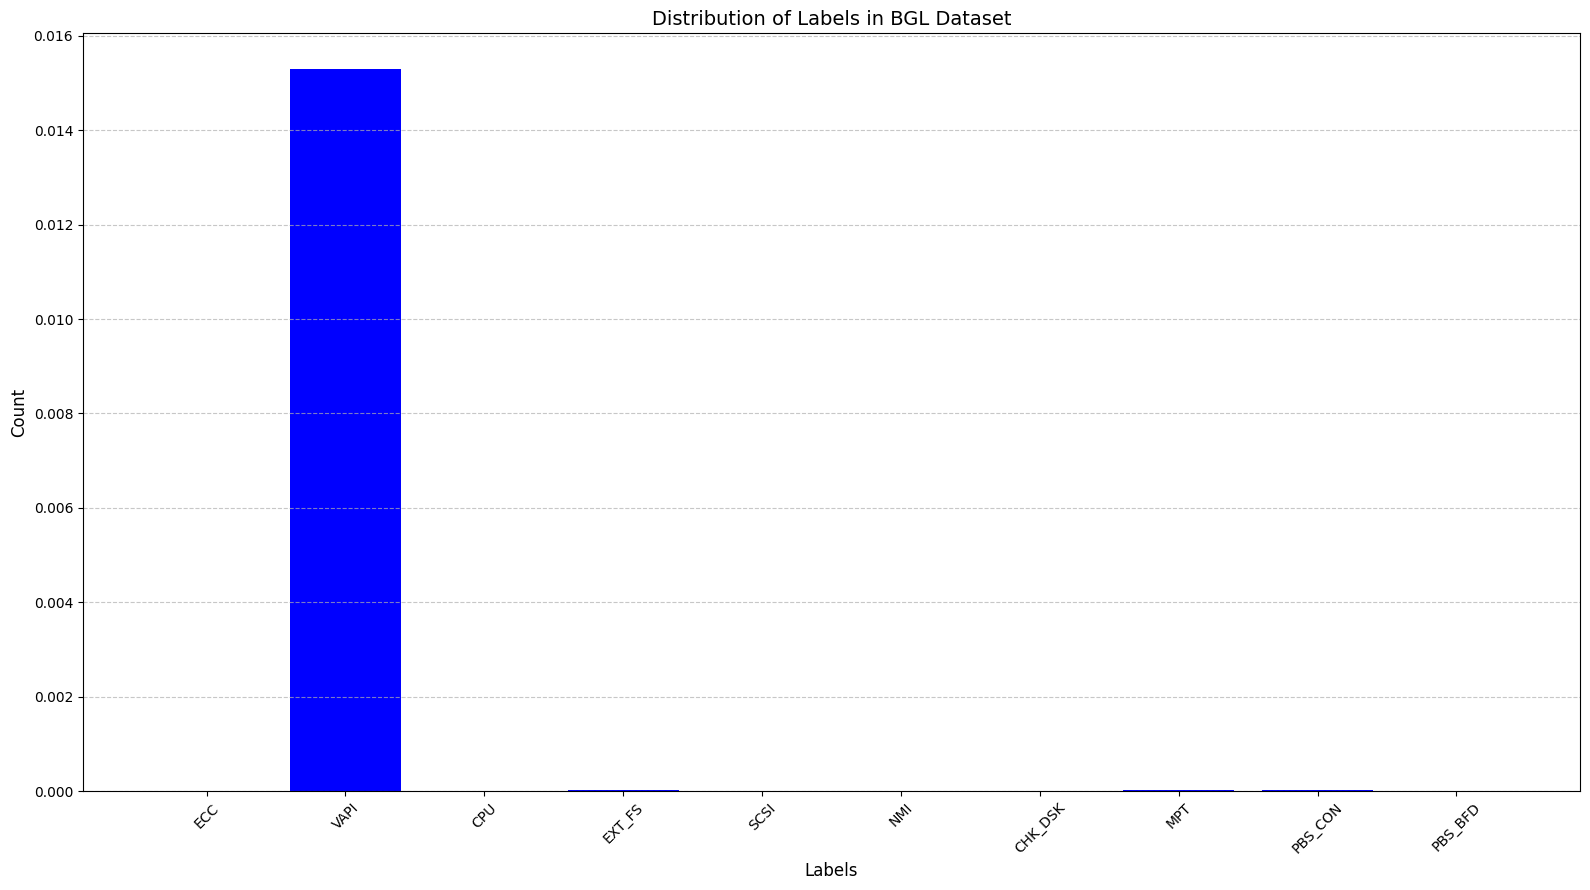

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(tb_label[1:], tb_label_num[1:] / len(tb_df), color="blue")
plt.title("Distribution of Labels in thunderbird Dataset", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

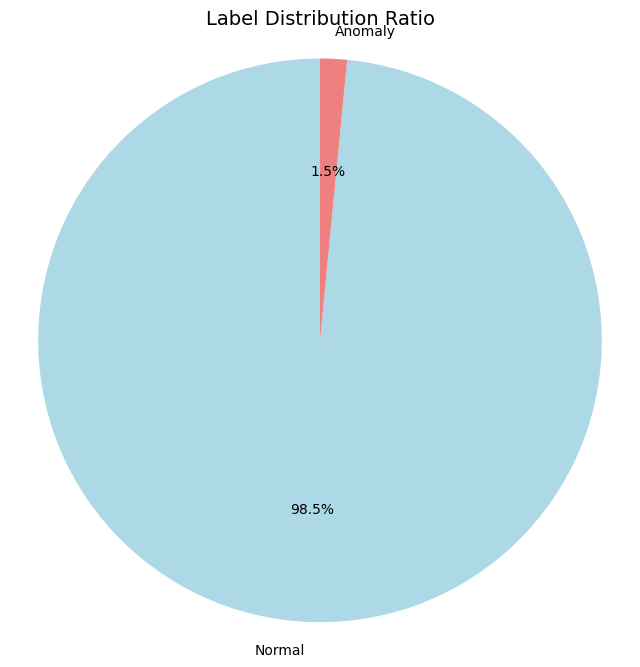

In [19]:
# 割合を計算
other_labels_ratio = tb_label_num[1:].sum() / len(tb_df)  # 2番目以降のラベルの割合
first_label_ratio = 1 - other_labels_ratio  # 最初のラベルの割合

# 円グラフを作成
labels = ["Normal", "Anomaly"]
sizes = [first_label_ratio, other_labels_ratio]
colors = ["lightblue", "lightcoral"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Label Distribution Ratio", fontsize=14)
plt.axis("equal")  # 円を完全な円にする
plt.show()

---
# HDFS

In [15]:
# ファイルパスを指定
log_file = "../../dataset/loghub/HDFS/preprocessed/anomaly_label.csv"

# DataFrameに変換
hdfs_df = pd.read_csv(log_file)

# DataFrameの確認
print(hdfs_df.head())

                    BlockId    Label
0  blk_-1608999687919862906   Normal
1   blk_7503483334202473044   Normal
2  blk_-3544583377289625738  Anomaly
3  blk_-9073992586687739851   Normal
4   blk_7854771516489510256   Normal


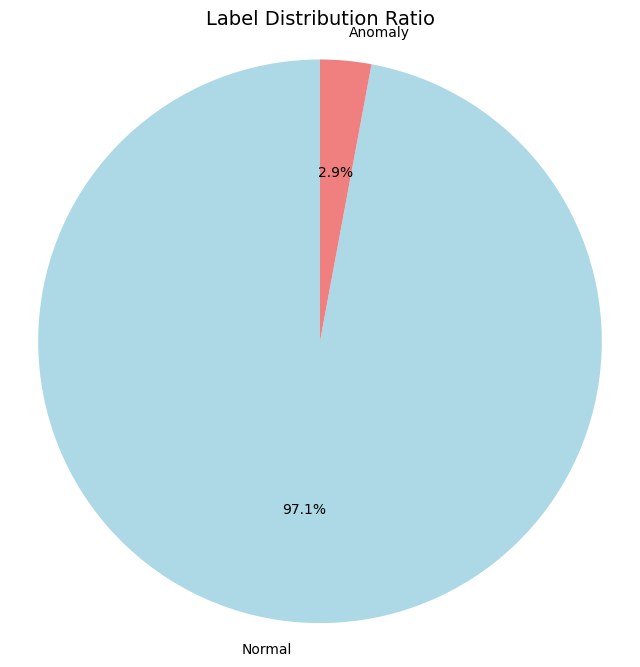

In [17]:
# 割合を計算
other_labels_ratio = len(hdfs_df[hdfs_df["Label"] == "Anomaly"]) / len(
    hdfs_df
)  # 2番目以降のラベルの割合
first_label_ratio = 1 - other_labels_ratio  # 最初のラベルの割合

# 円グラフを作成
labels = ["Normal", "Anomaly"]
sizes = [first_label_ratio, other_labels_ratio]
colors = ["lightblue", "lightcoral"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Label Distribution Ratio", fontsize=14)
plt.axis("equal")  # 円を完全な円にする
plt.show()